<a href="https://colab.research.google.com/github/SANKARMOHAN/DSA_assignments/blob/main/DSA_Case_Study_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

Reading data into python

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


Checking datatypes and null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**1) Find out how many males and females participated in the test.**

In [7]:
totl_female = data[data['gender']=='female']
totl_female['gender'].count()
totl_male = data[data['gender']=='male']
totl_male['gender'].count()
data1 = {'Gender': ['Female','Male'],'Count':[totl_female['gender'].count(),totl_male['gender'].count()]}
data1 = pd.DataFrame(data1)
data1

,Gender,Count
0,Female,518
1,Male,482


In [ ]:
#There are 518 female & 482 male partcipants.

2) What do you think about the students' parental level of education?

In [16]:
parentlevl = data.groupby('parental level of education')['gender'].count()
parentlevl = pd.DataFrame(parentlevl).reset_index()
parentlevl.rename(columns = {'gender' : 'count'}, inplace = True)
parentlevl

,parental level of education,count
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


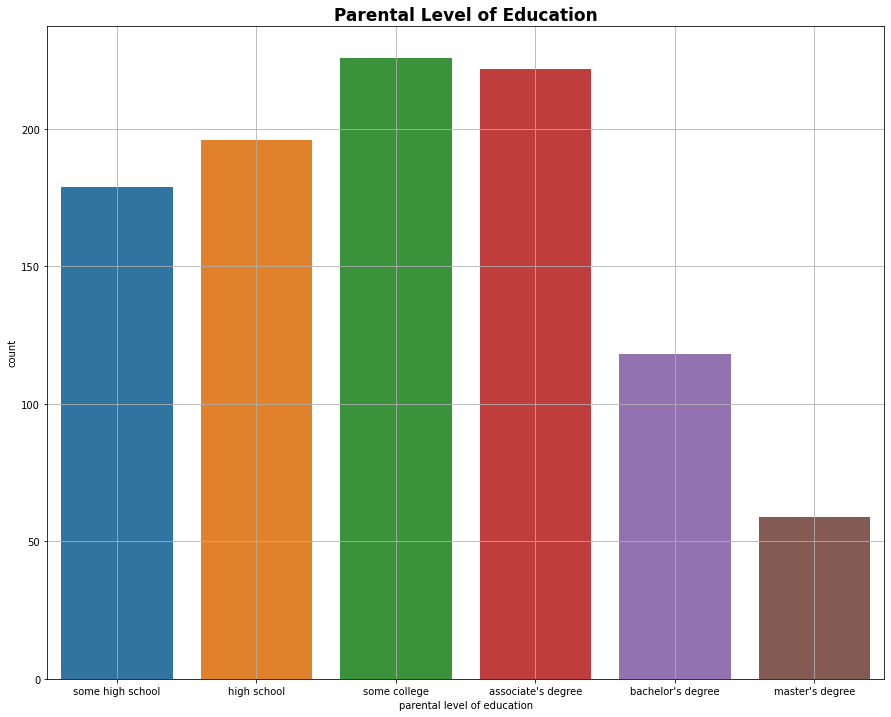

In [15]:
plt.figure(figsize=(15,12))
sns.countplot(x='parental level of education',data=data)
plt.title('Parental Level of Education',fontsize=17,fontweight='bold')
plt.grid()

From the graph,it is clear that most of the parents have college level education.

3) Who scores the most on average for math, reading and writing based on

In [25]:
# Gender
maths = data.groupby('gender')['math score']
m1 = maths.mean()
reading = data.groupby('gender')['reading score']
r1 = reading.mean()
writing = data.groupby('gender')['writing score']
w1 = writing.mean()
score1 = {'Gender':['Female','Male'],'Math Score':[m1['female'],m1['male']],'Reading Score':[r1['female'],r1['male']],'Writing Score':[w1['female'],w1['female']]}
score1 = pd.DataFrame(score1)
score1

,Gender,Math Score,Reading Score,Writing Score
0,Female,63.376448,72.590734,72.467181
1,Male,68.821577,65.545643,72.467181


male scores more than female.

In [27]:
#Test preparation course
math = data.groupby('test preparation course')['math score']
m2 = math.mean()
read = data.groupby('test preparation course')['reading score']
r2 = read.mean()
write = data.groupby('test preparation course')['writing score']
w2 = write.mean()
score2 = {'test preparation course':['Completed','None'],'Math Score':[m2['completed'],m2['none']],'Reading Score':[r2['completed'],r2['none']],'Writing Score':[w2['completed'],w2['none']]}
score2 = pd.DataFrame(score2)
score2

,test preparation course,Math Score,Reading Score,Writing Score
0,Completed,69.96648,74.175978,74.684358
1,None,63.78972,66.417445,64.457944


students completed test preparation have more scores

4) What do you think about the scoring variation for math, reading and writing based on

In [30]:
#gender
m3 = data.groupby('gender')['math score'].var()
r3 = data.groupby('gender')['reading score'].var()
w3 = data.groupby('gender')['writing score'].var()
score3 = {'Gender':['Female','Male'],'Math Score':[m3['female'],m3['male']],'Reading Score':[r3['female'],r3['male']],'Writing Score':[w3['female'],w3['female']]}
score3 = pd.DataFrame(score3)
score3

,Gender,Math Score,Reading Score,Writing Score
0,Female,256.958593,207.677438,220.369327
1,Male,211.889097,200.211010,220.369327


Females have more scores in reading than males,for writing its same.

In [31]:
m4 = data.groupby('test preparation course')['math score'].var()
r4 = data.groupby('test preparation course')['reading score'].var()
w4 = data.groupby('test preparation course')['writing score'].var()
score4 = {'test preparation course':['Completed','None'],'Math Score':[m4['completed'],m4['none']],'Reading Score':[r4['completed'],r4['none']],'Writing Score':[w4['completed'],w4['none']]}
score4 = pd.DataFrame(score4)
score4

,test preparation course,Math Score,Reading Score,Writing Score
0,Completed,210.884027,183.265864,175.202612
1,None,246.668662,213.419851,226.251739


Score variation in reading and writing for test completed students are less than others.

5) The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [32]:
top25 = data.nlargest(250,'math score')
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


Top 250 students list were sorted from total 1000 students by the basis of their scores in math.

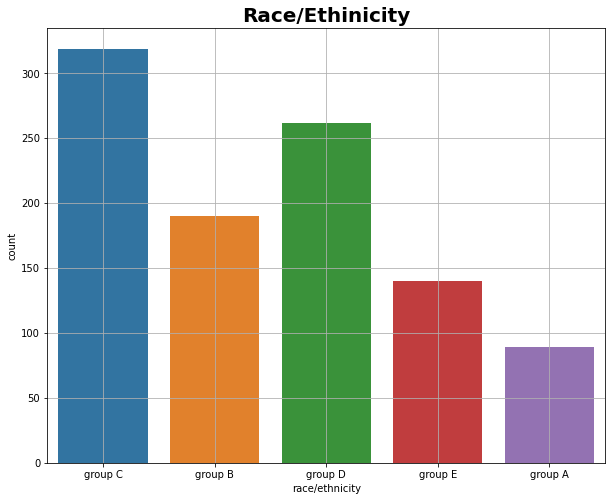

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x='race/ethnicity',data=data)
plt.title('Race/Ethinicity',fontsize=20,fontweight='bold')
plt.grid()